In [1]:
from IPython.core.display import display
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def iou(i1, i2):
    return (i1 * i2).sum() / ((i1 + i2) > 0).sum()

In [3]:
res_df = pd.read_csv('../Dataset/OpenPart.csv')

In [4]:
for i, row in res_df.iterrows():
    im_name = row['Case'].split('.')[0]
    im0 = np.array(Image.open(f'../Dataset/Expert/{im_name}_expert.png')) / 255
    im1 = np.array(Image.open(f'../Dataset/sample_1/{im_name}_s1.png')) / 255
    im2 = np.array(Image.open(f'../Dataset/sample_2/{im_name}_s2.png')) / 255
    im3 = np.array(Image.open(f'../Dataset/sample_3/{im_name}_s3.png')) / 255
    
    res_df.loc[i, 'o%'] = im0.sum() / im0.size
    res_df.loc[i, 's1%'] = im1.sum() / im1.size
    res_df.loc[i, 's2%'] = im2.sum() / im2.size
    res_df.loc[i, 's3%'] = im3.sum() / im3.size
    
    res_df.loc[i, 'iou s1'] = iou(im0, im1)
    res_df.loc[i, 'iou s2'] = iou(im0, im2)
    res_df.loc[i, 'iou s3'] = iou(im0, im3)
    
    res_df.loc[i, 'Recall 1'] = (im0 * im1).sum() / im0.sum()
    res_df.loc[i, 'Recall 2'] = (im0 * im2).sum() / im0.sum()
    res_df.loc[i, 'Recall 3'] = (im0 * im3).sum() / im0.sum()
    
    res_df.loc[i, 'Precision 1'] = (im0 * im1).sum() / im1.sum()
    res_df.loc[i, 'Precision 2'] = (im0 * im2).sum() / im2.sum()
    res_df.loc[i, 'Precision 3'] = (im0 * im3).sum() / im3.sum()
    
res_df = res_df[['Case', 'o%', 
                 'Sample 1', 's1%', 'iou s1', 'Recall 1', 'Precision 1', 
                 'Sample 2', 's2%', 'iou s2', 'Recall 2', 'Precision 2', 
                 'Sample 3', 's3%', 'iou s3', 'Recall 3', 'Precision 3']]

display(res_df.head())
res_df.to_csv('./metrics.csv')

c:\users\dmitry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
c:\users\dmitry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
c:\users\dmitry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
c:\users\dmitry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
c:\users\dmitry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
c:\users\dmitry\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
c:\users\dmitry\appdata\local\programs\pytho

,Case,o%,Sample 1,s1%,iou s1,Recall 1,Precision 1,Sample 2,s2%,iou s2,Recall 2,Precision 2,Sample 3,s3%,iou s3,Recall 3,Precision 3
0,00000072_000.png,0.000000,1,0.002023,0.000000,NaN,0.000000,5,0.000000,NaN,NaN,NaN,1,0.010334,0.000000,NaN,0.000000
1,00000150_002.png,0.002603,5,0.000915,0.351411,0.351411,1.000000,5,0.007191,0.306655,0.883107,0.319629,3,0.037664,0.069099,1.000000,0.069099
2,00000181_061.png,0.059184,4,0.165252,0.350949,0.985127,0.352818,4,0.249554,0.237160,1.000000,0.237160,3,0.052490,0.381895,0.521455,0.587954
3,00000211_019.png,0.132388,4,0.239925,0.548791,0.996492,0.549853,4,0.275949,0.479757,1.000000,0.479757,2,0.195328,0.578907,0.907614,0.615157
4,00000211_041.png,0.118519,3,0.272406,0.391747,0.928433,0.403945,5,0.199059,0.215285,0.474677,0.282621,2,0.211349,0.434879,0.843542,0.473034


In [5]:
def visualize_mask(filename: str, idxs: list):
    image_origin = np.array(Image.open(f'../Dataset/Origin/{filename}.png'))
    image_origin = np.stack([image_origin, image_origin, image_origin], axis=2)
    im0 = np.array(Image.open(f'../Dataset/Expert/{filename}_expert.png')) / 255
    im1 = np.array(Image.open(f'../Dataset/sample_1/{filename}_s1.png')) / 255
    im2 = np.array(Image.open(f'../Dataset/sample_2/{filename}_s2.png')) / 255
    im3 = np.array(Image.open(f'../Dataset/sample_3/{filename}_s3.png')) / 255
    
    if 0 in idxs:
        image_0 = image_origin.copy()
        image_0[im0 > 0, :] = image_0[im0 > 0, :] // 2
        image_0[:, :, 0] = image_0[:, :, 0] + im0 * 127

        plt.imshow(image_0)
        plt.show()
    
    if 1 in idxs:
        image_1 = image_origin.copy()
        image_1[im1 > 0, :] = image_1[im1 > 0, :] // 2
        image_1[:, :, 0] = image_1[:, :, 0] + im1 * 127

        plt.imshow(image_1)
        plt.show()
    
    if 2 in idxs:
        image_2 = image_origin.copy()
        image_2[im2 > 0, :] = image_2[im2 > 0, :] // 2
        image_2[:, :, 0] = image_2[:, :, 0] + im2 * 127

        plt.imshow(image_2)
        plt.show()
    
    if 3 in idxs:
        image_3 = image_origin.copy()
        image_3[im3 > 0, :] = image_3[im3 > 0, :] // 2
        image_3[:, :, 0] = image_3[:, :, 0] + im3 * 127

        plt.imshow(image_3)
        plt.show()

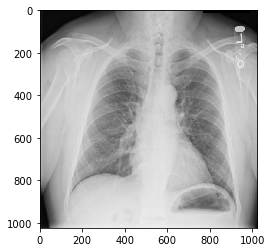

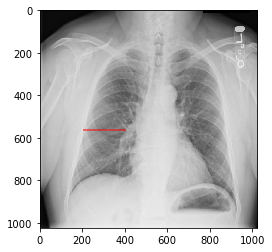

In [6]:
visualize_mask('00002597_000', [0, 2])

In [44]:
display(res_df[['Sample 1', 'iou s1']].corr(method='pearson'))
display(res_df[['Sample 2', 'iou s2']].corr(method='pearson'))
display(res_df[['Sample 3', 'iou s3']].corr(method='pearson'))

display(res_df[['Sample 1', 'Recall 1']].corr(method='pearson'))
display(res_df[['Sample 2', 'Recall 2']].corr(method='pearson'))
display(res_df[['Sample 3', 'Recall 3']].corr(method='pearson'))

display(res_df[['Sample 1', 'Precision 1']].corr(method='pearson'))
display(res_df[['Sample 2', 'Precision 2']].corr(method='pearson'))
display(res_df[['Sample 3', 'Precision 3']].corr(method='pearson'))

,Sample 1,iou s1
Sample 1,1.000000,0.809485
iou s1,0.809485,1.000000


,Sample 2,iou s2
Sample 2,1.000000,0.605909
iou s2,0.605909,1.000000


,Sample 3,iou s3
Sample 3,1.000000,0.788403
iou s3,0.788403,1.000000


,Sample 1,Recall 1
Sample 1,1.000000,0.439455
Recall 1,0.439455,1.000000


,Sample 2,Recall 2
Sample 2,1.000000,0.571437
Recall 2,0.571437,1.000000


,Sample 3,Recall 3
Sample 3,1.000000,0.686819
Recall 3,0.686819,1.000000


,Sample 1,Precision 1
Sample 1,1.000000,0.784515
Precision 1,0.784515,1.000000


,Sample 2,Precision 2
Sample 2,1.000000,0.399693
Precision 2,0.399693,1.000000


,Sample 3,Precision 3
Sample 3,1.000000,0.446492
Precision 3,0.446492,1.000000
